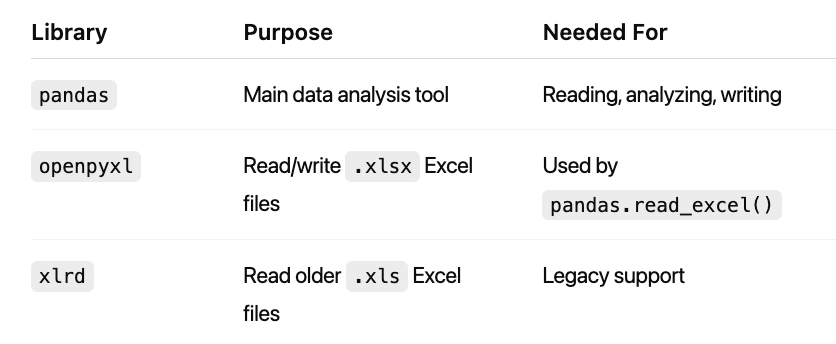

In [9]:
pip install openpyxl pandas xlrd

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
#read an Excel file into a DataFrame

df = pd.read_excel(r'/Users/camilamillicovsky/Desktop/DI-Bootcamp/Week14/Day 5/List of Holidays.xlsx', header=2)
#df = pd.read_excel('your_file.xlsx', sheet_name='Sheet1')

print(df.head(10))  # Display the first few rows of the DataFrame
df.info()

     Country          Resort Name  No of Days Travel Method  Price Holiday ID
0  Australia   Great Barrier Reef          32         Plane    750    I990AUS
1  Australia                Perth          28         Plane    985    AUS112J
2      Chile             Santiago          21         Plane   1259     CH266H
3    England               London           3         Train     69     I456UK
4    England               Bognor           1         Coach     12     BG726H
5     France                 Lyon          14         Plane    399    A7995FR
6     France  Paris - Euro Disney           5         Train    269    TH789FR
7     France  Paris - Euro Disney           3         Train    125    TH788FR
8     France                 Nice           7         Plane    289    I7897FR
9     France             Toulouse           7         Train    256    SG7637L
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtyp

In [11]:
df.info()
df.describe(include='all')  # Summary stats for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        28 non-null     object
 1   Resort Name    28 non-null     object
 2   No of Days     28 non-null     int64 
 3   Travel Method  28 non-null     object
 4   Price          28 non-null     int64 
 5   Holiday ID     28 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.4+ KB


,Country,Resort Name,No of Days,Travel Method,Price,Holiday ID
count,28,28,28.000000,28,28.000000,28
unique,9,21,NaN,3,NaN,27
top,Spain,Barcelona,NaN,Plane,NaN,I6675SP
freq,12,4,NaN,17,NaN,2
mean,NaN,NaN,10.821429,NaN,388.142857,NaN
std,NaN,NaN,7.562351,NaN,330.782318,NaN
min,NaN,NaN,1.000000,NaN,12.000000,NaN
25%,NaN,NaN,5.750000,NaN,199.000000,NaN
50%,NaN,NaN,8.000000,NaN,282.000000,NaN
75%,NaN,NaN,14.000000,NaN,358.500000,NaN


Add column with 'Price per Day'

In [12]:
df['Price per Day'] = df['Price'] / df['No of Days']

In [13]:
df

,Country,Resort Name,No of Days,Travel Method,Price,Holiday ID,Price per Day
0,Australia,Great Barrier Reef,32,Plane,750,I990AUS,23.437500
1,Australia,Perth,28,Plane,985,AUS112J,35.178571
2,Chile,Santiago,21,Plane,1259,CH266H,59.952381
3,England,London,3,Train,69,I456UK,23.000000
4,England,Bognor,1,Coach,12,BG726H,12.000000
5,France,Lyon,14,Plane,399,A7995FR,28.500000
6,France,Paris - Euro Disney,5,Train,269,TH789FR,53.800000
7,France,Paris - Euro Disney,3,Train,125,TH788FR,41.666667
8,France,Nice,7,Plane,289,I7897FR,41.285714
9,France,Toulouse,7,Train,256,SG7637L,36.571429


Create pivot table inside excel with pandas

pd.**pivot_table**(data,
               values='ColumnToAggregate',
               index='RowGroupBy',
               columns='ColumnGroupBy',
               aggfunc='function')


In [16]:
# The vacation price broken down by country and travel method
pivot = df.pivot_table(values='Price', index='Country', columns='Travel Method', aggfunc='mean')
print(pivot)

Travel Method  Coach     Plane       Train
Country                                   
Australia        NaN   867.500         NaN
Chile            NaN  1259.000         NaN
England         12.0       NaN   69.000000
France           NaN   325.000  216.666667
Germany        179.0       NaN         NaN
Peru             NaN   975.000         NaN
Saudi Arabia     NaN   995.000         NaN
Spain          199.0   252.375  245.666667
Trinidad         NaN   885.000         NaN


In [17]:
# Pivot table to show max price per country 
pivot2 = df.pivot_table(values='Price', index='Country', aggfunc='max')
print(pivot2)

              Price
Country            
Australia       985
Chile          1259
England          69
France          399
Germany         289
Peru            975
Saudi Arabia    995
Spain           345
Trinidad        885


Save file, add the pivot and pivot 2 tables we created 

In [ ]:
with pd.ExcelWriter("Holiday_Analysis_Cleaned.xlsx", engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Holiday Data', index=False) # add the df to sheet "Holiday Data"
    pivot.to_excel(writer, sheet_name='Pivot Table') # Add pivot table to a differente sheet
    pivot2.to_excel(writer, sheet_name='Pivot Table 2') # Add pivot2 table to a different sheet

#The file is saved in the Colab virtual environment (in-memory session), specifically in the /content/ directory.
# If using VSC - the file gets saved on same folder

Another example of exporting dataframe to excel

In [19]:
import pandas as pd
import os

# Creating a DataFrame
data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
        'Age': [28, 24, 35, 32]}
df = pd.DataFrame(data)

# Writing the DataFrame to an Excel file
df.to_excel('output_file.xlsx', index=False)


In [20]:
# Same data, now add computed salary
df['Salary'] = df['Age'] * 1000

# Save results
df.to_excel('calculated_data.xlsx', index=False)
df

,Name,Age,Salary
0,John,28,28000
1,Anna,24,24000
2,Peter,35,35000
3,Linda,32,32000


 Challenge: Add a "Tax" column with 13% of salary, and calculate "Net Salary". Then download a file with changes




In [22]:
# Add tax column 
df['Tax'] = df['Salary'] * 0.13

# Calculate Net Salary
df['Net Salary'] = df['Salary'] - df['Tax']
print(df.head())

# Save results
df.to_excel('tax_salary.xlsx', index=False)

    Name  Age  Salary     Tax  Net Salary
0   John   28   28000  3640.0     24360.0
1   Anna   24   24000  3120.0     20880.0
2  Peter   35   35000  4550.0     30450.0
3  Linda   32   32000  4160.0     27840.0


Exercise : Automate a Repetitive Excel Task Using a Python Script


In [23]:
from openpyxl import Workbook
from openpyxl.styles import Font
from openpyxl.styles import PatternFill
from openpyxl.utils import get_column_letter

# Create a new workbook and select the active worksheet
wb = Workbook() # create workbook 
ws = wb.active # select active worksheet 
ws.title = "Students" # add title to worksheet

# Define data to insert
data = [
 ['ID', 'Name', 'Group Number'],
    [1, 'Camila Millicovsky', '168_pt'],
    [2, 'Apolo Barnabas', '168_pt'],
    [3, 'Boris Khusid', '164_ft']
]

# Append rows to worksheet
for row in data:
    ws.append(row)

# Make header row bold
for cell in ws[1]:
    cell.font = Font(bold=True)


#Add Background Fill to Header Row
header_fill = PatternFill(start_color="FFC000", end_color="FFC000", fill_type="solid")

for cell in ws[1]:
    cell.fill = header_fill

#Auto-adjust Column Widths
for column in ws.columns:
    max_length = max(len(str(cell.value)) if cell.value is not None else 0 for cell in column)
    adjusted_width = max_length + 2
    ws.column_dimensions[get_column_letter(column[0].column)].width = adjusted_width


# Save the file in Colab's virtual directory
filename = 'formatted_students.xlsx'
wb.save(filename)

# OPTIONAL: Show the path
import os
print("File saved at:", os.path.abspath(filename))

# Download the file to your local machine if you're using collab
#from google.colab import files
#files.download(filename)


File saved at: /Users/camilamillicovsky/Desktop/DI-Bootcamp/Week14/Day 5/formatted_students.xlsx


In [ ]:
from openpyxl import Workbook

# Create a new workbook
wb = Workbook()

# Get the active worksheet and rename it
ws1 = wb.active
ws1.title = "DataSheet"

# Add a second worksheet named "SummarySheet"
ws2 = wb.create_sheet(title="SummarySheet")

# Insert headers and data into "DataSheet" using the names of the columns
# Good for changing a specific value in an existing table
ws1['A1'] = 'Name'
ws1['B1'] = 'Age'
ws1['A2'] = 'Alice'
ws1['B2'] = 30
ws1['A3'] = 'Bob'
ws1['B3'] = 25

In [25]:
from openpyxl.styles import PatternFill, Alignment

# Merge cells B1 to D1 and add a custom header
ws1.merge_cells('B1:D1')
ws1['B1'] = "Merged Header"

# Center the text inside the merged cell
ws1['B1'].alignment = Alignment(horizontal='center', vertical='center')

# Apply blue background color to the merged cell
fill = PatternFill(start_color="FF224677", end_color="FF224677", fill_type="solid")
ws1['B1'].fill = fill

In [26]:
import pandas as pd
from openpyxl.utils.dataframe import dataframe_to_rows

# Create a pandas DataFrame
data = {'Name': ['Charlie', 'Diana'], 'Age': [40, 35]}
df = pd.DataFrame(data)
print(pd)

# Insert DataFrame into "SummarySheet"  
for row in dataframe_to_rows(df, index=False, header=True):
    ws2.append(row)

<module 'pandas' from '/opt/anaconda3/lib/python3.13/site-packages/pandas/__init__.py'>


In [27]:
# Save the workbook to a file
wb.save('example_workbook.xlsx')

In [28]:
from openpyxl import Workbook
from openpyxl.styles import Font
#Create a new workbook and select the active worksheet:
wb = Workbook()
ws = wb.active
#We will use a list of lists to enter into the Excel worksheet :
data = [
    ['Product', 'Price'],
    ['Apple', 1.2],
    ['Banana', 0.8],
    ['Cherry', 2.5]
]

In [29]:
# Append rows of data to ws 
for row in data:
    ws.append(row)

# Apply bold format to header row 
for cell in ws[1]:
    cell.font = Font(bold=True)

# Save ws 
wb.save('formatted_products.xlsx')

7. Use a loop to append each row of data to the worksheet:

8. Apply bold formatting to the header row (the first row) using the Font class:

9. Save the workbook to a file named formatted_products.xlsx.


After running the script, you should find a file named formatted_products.xlsx in the same directory as your script. When you open this file in Excel, you should see the following:

A table with the product names and prices.
The header row (Product and Price) will be bold.